# DFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

% matplotlib inline

### 1. Implement DFT and IDFT using Iteration

In [2]:
def DFT_loop(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    return [sum([x[i]*(Wn**(i*j)) for i in range(N)]) for j in range(N)]

In [3]:
def IDFT_loop(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    return [sum([x[i]*(Wn**(-i*j))/N for i in range(N)]) for j in range(N)]

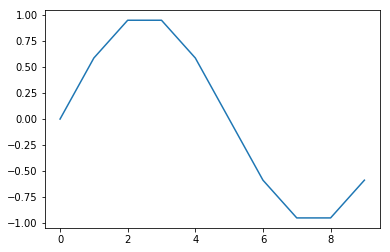

In [4]:
f = 10
N = 10
t = np.linspace(0, 1/f, N+1)[:-1]
x = np.sin(2*np.pi*t*f)

plt.plot(x)

In [5]:
% time
dft_loop = DFT_loop(x)
x_loop = IDFT_loop(dft_loop)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


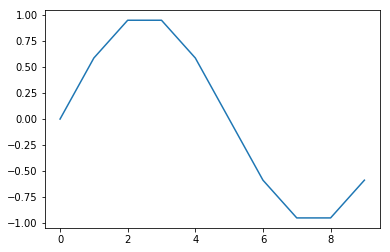

In [6]:
plt.plot(x_loop)

### 2. Implement DFT and IDFT Matrix Multiplication

In [7]:
def DFT_mat(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(N)
    D = (l_w.reshape(-1,1))**np.arange(N)
    return D.dot(x)

In [8]:
def IDFT_mat(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(0, -N, -1)
    D = (l_w.reshape(-1,1))**np.arange(N)/N
    return D.dot(x)

In [9]:
% time
dft_mat = DFT_mat(x)
x_mat = IDFT_mat(dft_mat)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.4 µs


/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


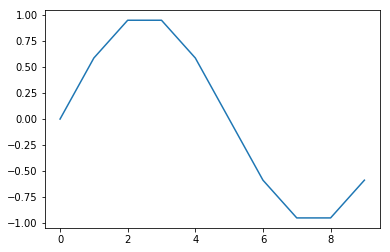

In [10]:
plt.plot(x_mat)

In [26]:
from scipy.linalg import dft
D = dft(len(x))
dft_true = D.dot(x)

In [31]:
dft_true, dft_mat

(array([  0.00000000e+00 +0.00000000e+00j,
         -4.99600361e-16 -5.00000000e+00j,
         -2.77555756e-17 +1.11022302e-16j,
          1.11022302e-16 +2.22044605e-16j,
          0.00000000e+00 -2.22044605e-16j,
          3.33066907e-16 +1.98955933e-16j,
          2.77555756e-16 +4.99600361e-16j,
          5.55111512e-17 +5.55111512e-16j,
          3.60822483e-16 +1.77635684e-15j,  -6.32827124e-15 +5.00000000e+00j]),
 array([  0.00000000e+00 +0.00000000e+00j,
         -4.99600361e-16 -5.00000000e+00j,
          9.15933995e-16 +2.22044605e-16j,
          2.77555756e-17 +0.00000000e+00j,
          5.55111512e-16 -1.66533454e-16j,
          7.77156117e-16 +0.00000000e+00j,
          3.33066907e-16 +4.99600361e-16j,
          6.66133815e-16 +2.22044605e-16j,
          2.88657986e-15 -3.33066907e-16j,  -3.88578059e-15 +5.00000000e+00j]))

/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


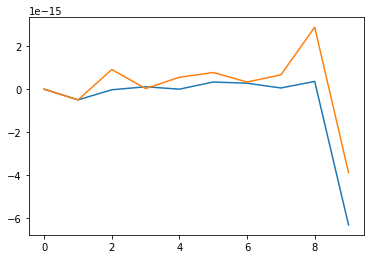

In [30]:
plt.plot(dft_true)
plt.plot(dft_mat)

### Plot Computation time of 1 and 2

In [11]:
def make_x(N, f = 10):
    t = np.linspace(0, 1/f, N+1)[:-1]
    x = np.sin(2*np.pi*t*f)
    return x

In [58]:
def time_loop(f = 10):
    t = []
    for i in range(2, 100):
        x = make_x(i, f)
        start = time()
        temp = DFT_loop(x)
        end = time()
        t.append(end-start)
    return t

In [59]:
def time_mat(f = 10):
    t = []
    for i in range(2, 100):
        x = make_x(i, f)
        start = time()
        temp = DFT_mat(x)
        end = time()
        t.append(end-start)
    return t

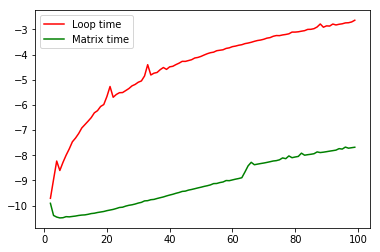

In [63]:
t_loop = time_loop()
t_mat = time_mat()

plt.plot(range(2, 100), np.log(t_loop), 'red')
plt.plot(range(2, 100), np.log(t_mat), 'green')
plt.legend(['Loop time', 'Matrix time'])

# Duality

DFT(G[n]) = N*g[<-k>] 

In [16]:
G = DFT_mat(x)
g = x
N = len(x)

In [17]:
DFT_G = DFT_mat(G)

/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


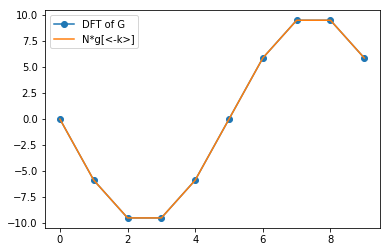

In [19]:
plt.plot(DFT_G, '-o')
plt.plot([g[(-i)%N]*N for i in range(N)])
plt.legend(['DFT of G', 'N*g[<-k>]'])